In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sys
import scipy.stats as st
from sklearn.preprocessing import LabelEncoder
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#### Наполнение таблицы
    user_id: зашифрованный идентификатор пользователя;
    ad_channel: канал коммуникации (например, поиск, видеореклама, баннерная реклама, партнёрские сети, органический трафик сайта);
    funnel_stage: этап воронки;
    price: затраты на рекламу;
    profit: прибыль на этапе покупки, в остальных случаях маркируется как None;
    os: операционная система, которой пользуется человек;
    timestamp: время совершения действия юзером.

### Формирование витрины данных

In [2]:
banner = pd.read_excel('Копия banner.xlsx')
banner

,user_id,funnel_stage,timestamp,profit,os
0,666743,interest,150000,NaN,Android
1,47061,interest,150000,NaN,Android
2,587720,interest,150000,NaN,Android
3,991300,intent,150001,NaN,iOS
4,289020,interest,150001,NaN,Android
...,...,...,...,...,...
730445,319234,intent,201458,NaN,Android
730446,113762,intent,201478,NaN,Android
730447,874686,purchase,201579,520.0,iOS
730448,574291,intent,201581,NaN,Android


In [3]:
native = pd.read_csv('Копия native.csv')
native = native.drop(['Unnamed: 0'],axis=1)
native

,user_id,funnel_stage,timestamp,profit,os
0,602424,interest,150002,NaN,iOS
1,217793,interest,150010,NaN,iOS
2,978521,interest,150010,NaN,iOS
3,747938,interest,150013,NaN,iOS
4,809853,interest,150016,NaN,iOS
...,...,...,...,...,...
130596,704762,consideration,200781,NaN,iOS
130597,659956,consideration,200792,NaN,iOS
130598,500938,consideration,200843,NaN,iOS
130599,388053,purchase,201095,2136.0,Android


In [4]:
organic = pd.read_csv('Копия organic_traffic.csv')
organic['timestamp'] = organic['150001']
organic['profit'] = organic['Unnamed: 4']
organic['os'] = organic['iOS']
organic['funnel_stage'] = organic['interest']
organic['user_id'] = organic['764740']
organic = organic.drop(['17','764740','interest','150001','Unnamed: 4','iOS'],axis=1)
organic

,timestamp,profit,os,funnel_stage,user_id
0,150002,NaN,Android,interest,476137
1,150002,NaN,Android,interest,959652
2,150004,NaN,Android,interest,227224
3,150006,NaN,Android,interest,541742
4,150006,NaN,Android,interest,937514
...,...,...,...,...,...
607353,201892,NaN,Android,intent,946024
607354,202012,50.0,Android,purchase,1036500
607355,202053,50.0,iOS,purchase,539693
607356,202140,1099.0,Android,purchase,583326


In [5]:
other = pd.read_csv('Копия other.csv')
other = other.drop(['Unnamed: 0'],axis=1)
other

,user_id,funnel_stage,timestamp,profit,os
0,866112,interest,150009,NaN,Android
1,634356,interest,150014,NaN,iOS
2,160340,interest,150030,NaN,Android
3,1004246,interest,150036,NaN,Android
4,897963,interest,150048,NaN,Android
...,...,...,...,...,...
21326,109868,intent,200943,NaN,Android
21327,820384,intent,201041,NaN,Android
21328,394552,intent,201073,NaN,Android
21329,394552,purchase,201184,50.0,Android


In [6]:
partner = pd.read_csv('Копия partner_network.csv')
partner['funnel_stage']=partner['interest']
partner['timestamp']=partner['150000']
partner['user_id']=partner['561010']
partner['profit']=partner['Unnamed: 4']
partner['os']=partner['iOS']
partner = partner.drop(['8','561010','interest','150000','Unnamed: 4','iOS'],axis=1)
partner

,funnel_stage,timestamp,user_id,profit,os
0,interest,150000,800792,NaN,Android
1,interest,150000,1035593,NaN,Android
2,interest,150002,863728,NaN,iOS
3,interest,150002,593703,NaN,Android
4,interest,150002,847879,NaN,Android
...,...,...,...,...,...
461866,intent,201348,548770,NaN,iOS
461867,purchase,201375,734166,520.0,Android
461868,intent,201381,214696,NaN,iOS
461869,intent,201867,909107,NaN,iOS


In [7]:
rich = pd.read_excel('Копия rich.xlsx')


In [8]:
s = pd.Series(rich['funnel_stage'])
s=s.str.lower()

In [9]:
rich['funnel_stage'] = s
rich

,user_id,funnel_stage,timestamp,profit,os
0,278945,interest,150000,NaN,iOS
1,246655,interest,150004,NaN,iOS
2,777208,interest,150009,NaN,Android
3,737227,interest,150009,NaN,iOS
4,599994,interest,150015,NaN,Android
...,...,...,...,...,...
73619,28732,intent,201143,NaN,iOS
73620,817066,intent,201255,NaN,iOS
73621,827850,intent,201446,NaN,iOS
73622,732690,intent,201462,NaN,iOS


In [10]:
search = pd.read_csv('Копия search.csv')


In [11]:
v= pd.Series(search['funnel_stage'])
v = v.str.lower()

In [12]:
search['funnel_stage'] = v
search = search.drop(['Unnamed: 0'],axis=1)
search

,user_id,funnel_stage,timestamp,profit,os
0,387356,interest,150000,NaN,iOS
1,619571,consideration,150000,NaN,iOS
2,230119,interest,150000,NaN,iOS
3,399556,interest,150000,NaN,iOS
4,556959,interest,150001,NaN,Android
...,...,...,...,...,...
1491200,501946,intent,224125,NaN,Android
1491201,749577,purchase,224647,2136.0,iOS
1491202,929180,intent,224682,NaN,iOS
1491203,1034498,intent,225430,NaN,iOS


In [13]:
video = pd.read_csv('Копия video.csv')
video=video.drop(['Unnamed: 0'],axis=1)
video

,user_id,funnel_stage,timestamp,profit,os
0,512217,interest,150000,NaN,iOS
1,833649,interest,150000,NaN,Android
2,327813,interest,150002,NaN,Android
3,241345,interest,150004,NaN,iOS
4,212554,interest,150004,NaN,Android
...,...,...,...,...,...
712334,446310,consideration,200926,NaN,Android
712335,340340,consideration,200927,NaN,Android
712336,313410,consideration,200951,NaN,iOS
712337,32380,consideration,200953,NaN,Android


In [14]:
search['ad_channel'] = 'search'
organic['ad_channel'] = 'organic_traffic'
partner['ad_channel'] = 'partner_network'
rich['ad_channel'] = 'rich'
banner['ad_channel'] = 'banner'
video['ad_channel'] = 'video'
native['ad_channel'] = 'native'
other['ad_channel'] = 'other'

In [15]:
marketing = pd.concat([video,search,rich,partner,other,organic,banner,native])
marketing

,user_id,funnel_stage,timestamp,profit,os,ad_channel
0,512217,interest,150000,NaN,iOS,video
1,833649,interest,150000,NaN,Android,video
2,327813,interest,150002,NaN,Android,video
3,241345,interest,150004,NaN,iOS,video
4,212554,interest,150004,NaN,Android,video
...,...,...,...,...,...,...
130596,704762,consideration,200781,NaN,iOS,native
130597,659956,consideration,200792,NaN,iOS,native
130598,500938,consideration,200843,NaN,iOS,native
130599,388053,purchase,201095,2136.0,Android,native


### Формирование качества данных(чистка,проверка на фальсификацию,исследование)

<Axes: >

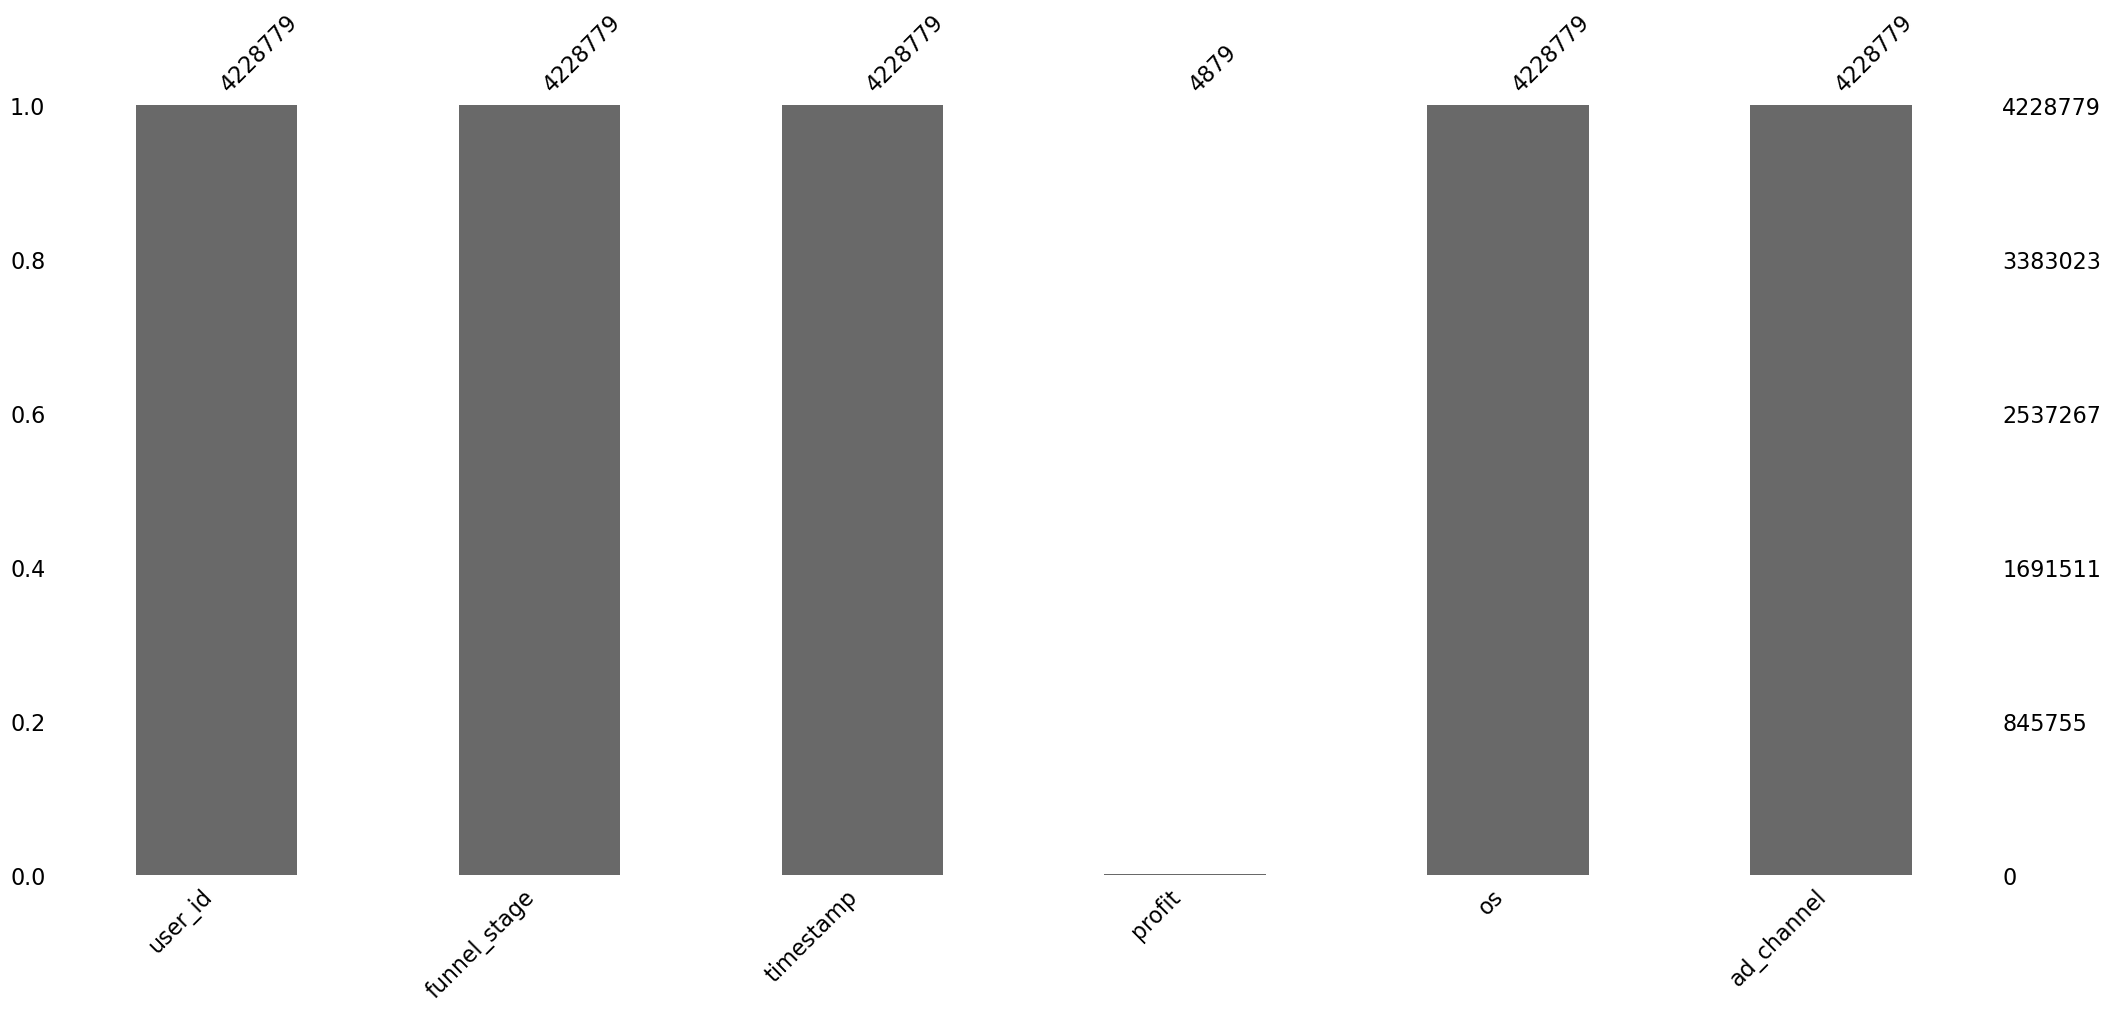

In [16]:
msno.bar(marketing)

In [17]:
marketing.profit = marketing.profit.fillna(0)

<Axes: >

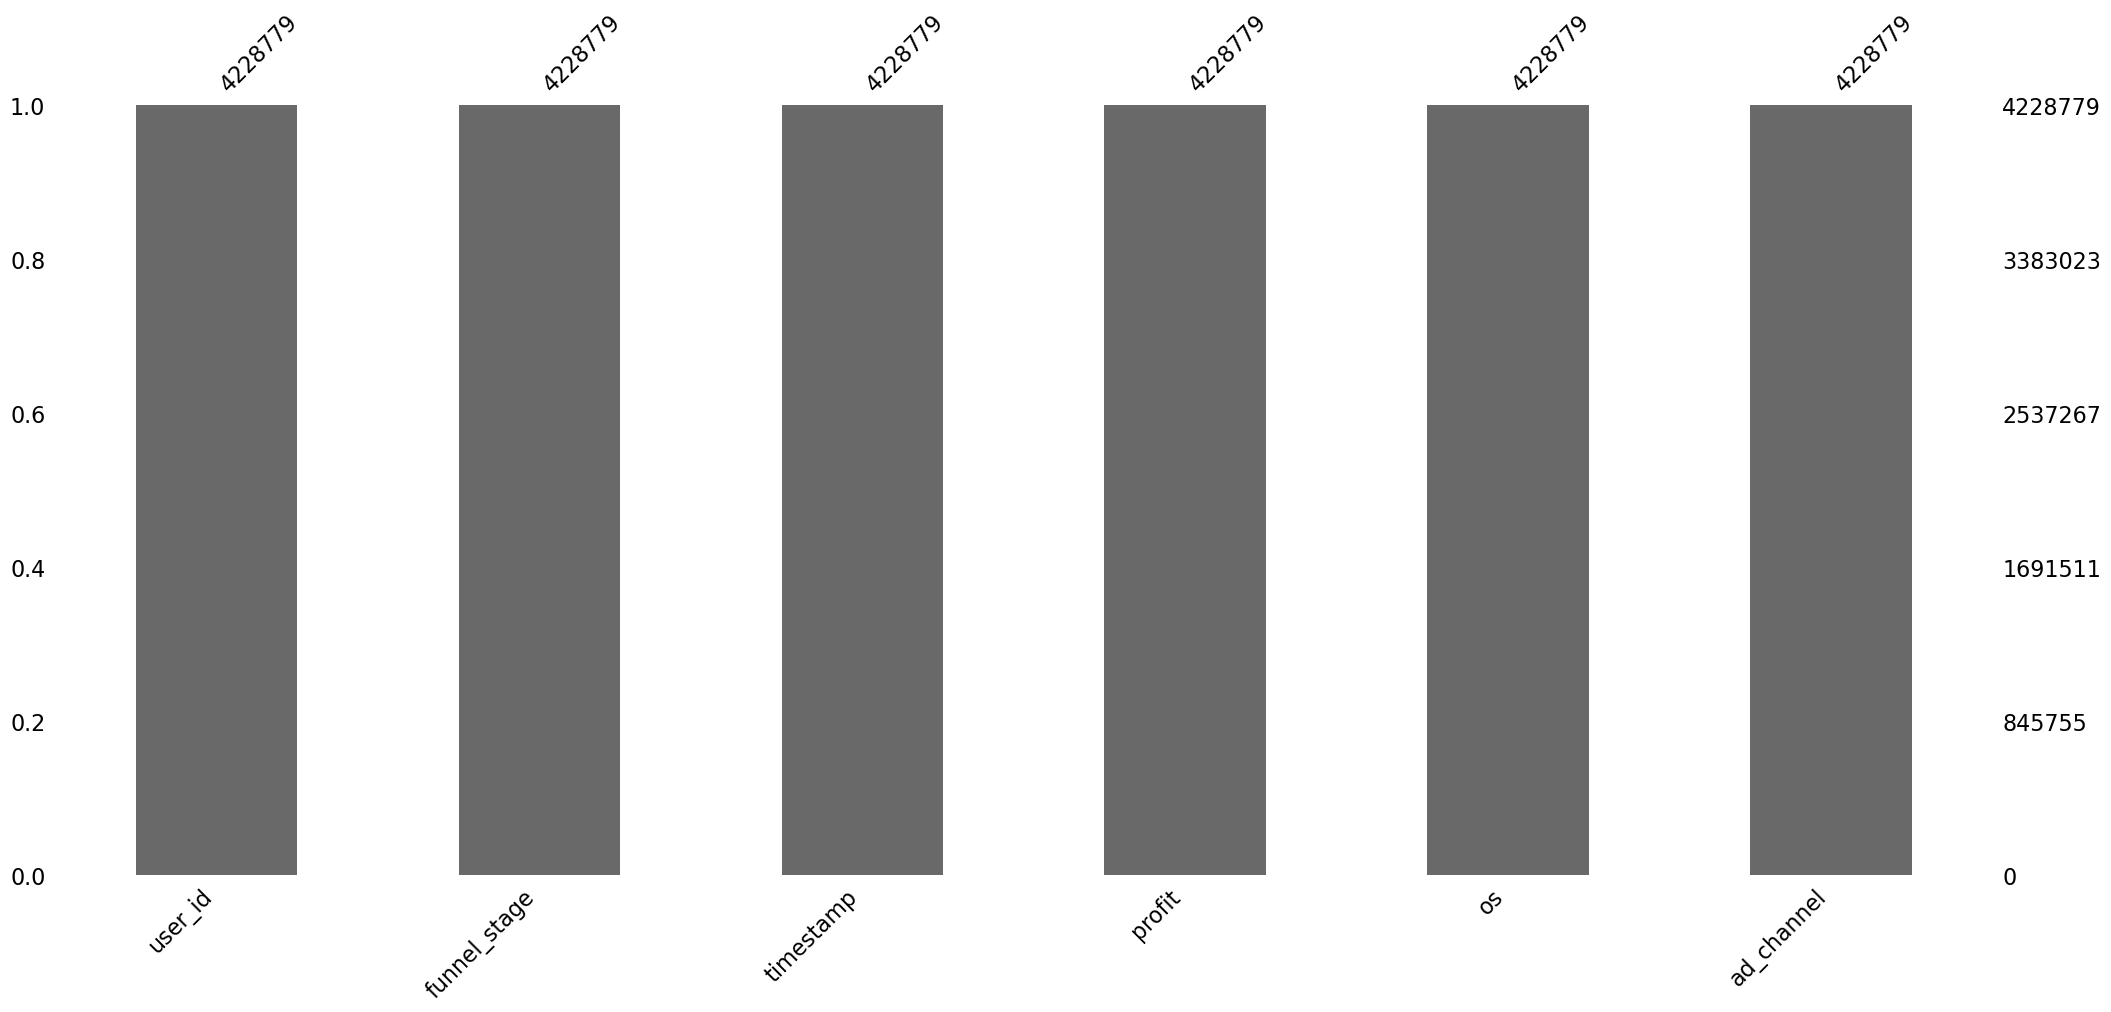

In [18]:
msno.bar(marketing)

In [19]:
marketing.duplicated().sum()

3234345

In [20]:
marketing[marketing.duplicated()]

,user_id,funnel_stage,timestamp,profit,os,ad_channel
78,856262,interest,150036,0.0,Android,video
79,856262,interest,150036,0.0,Android,video
80,856262,interest,150036,0.0,Android,video
81,856262,interest,150036,0.0,iOS,video
82,856262,interest,150036,0.0,Android,video
...,...,...,...,...,...,...
130277,174597,interest,199714,0.0,iOS,native
130278,174597,interest,199714,0.0,Android,native
130279,174597,interest,199714,0.0,Android,native
130280,174597,interest,199714,0.0,iOS,native


In [21]:
marketing.groupby(['ad_channel','funnel_stage']).nunique('user_id') # маленькая конверсия в покупку,маленькое время выполнения действия

user_id  timestamp  profit  os
ad_channel      funnel_stage                                 
banner          consideration    47454      30730       1   2
                intent            7630       7085       1   2
                interest         92002      42040       1   2
                purchase           690        685       6   2
native          consideration    12585      11098       1   2
                intent             411        408       1   2
                interest         19382      16067       1   2
                purchase            36         36       4   2
organic_traffic consideration    53618      32988       1   2
                intent            9164       8344       1   2
                interest         78718      39568       1   2
                purchase           540        534       6   2
other           consideration     1822       1776       1   2
                intent             232        232       1   2
                interest          3216       3108       1   2
                purchase            44         44       6   2
partner_network consideration    24737      19573       1   2
                intent            4422       4210       1   2
                interest         66225      36766       1   2
                purchase           453        444       4   2
rich            consideration     4658       4454       1   2
                intent            1238       1228       1   2
                interest          8921       8175       1   2
                purchase            21         21       2   2
search          consideration   134305      50908       1   2
                intent           27481      21928       1   2
                interest        224668      54554       1   2
                purchase          3090       2998       6   2
video           consideration    60876      35448       1   2
                intent              58         58       1   2
                interest         97964      43008       1   2
                purchase             5          5       4   2

<Axes: ylabel='Density'>

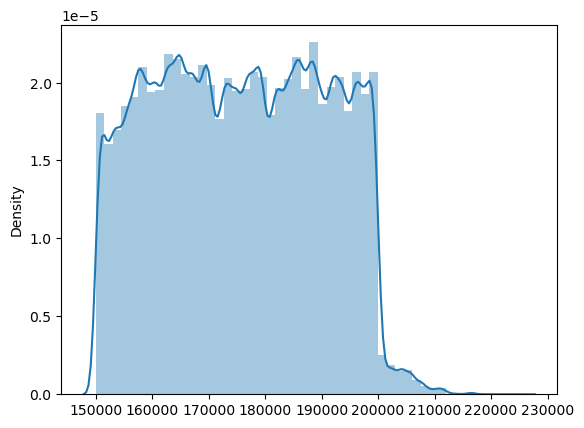

In [22]:
sns.distplot(marketing.timestamp.values)

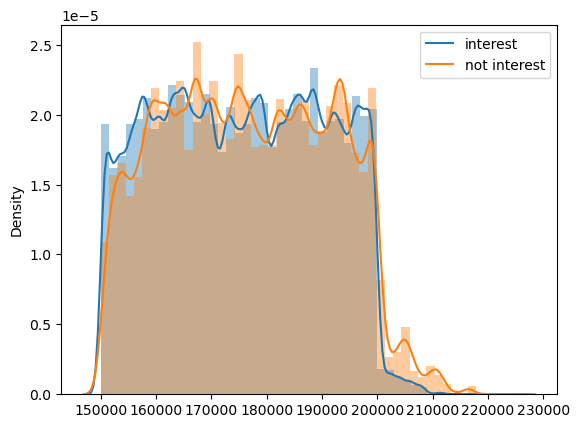

In [23]:
sns.distplot(marketing[marketing['funnel_stage']=='interest'].timestamp.values)
sns.distplot(marketing[marketing['funnel_stage']!='interest'].timestamp.values)
plt.legend(['interest','not interest'])

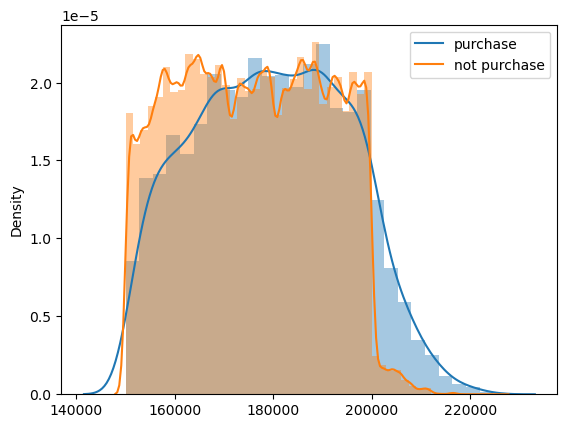

In [24]:
sns.distplot(marketing[marketing['funnel_stage']=='purchase'].timestamp.values)
sns.distplot(marketing[marketing['funnel_stage']!='purchase'].timestamp.values)
plt.legend(['purchase','not purchase'])

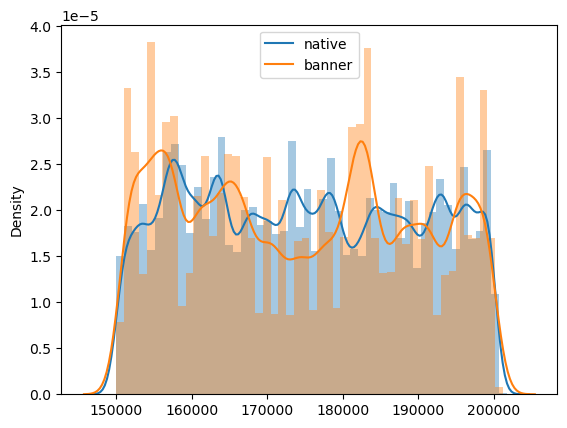

In [50]:
sns.distplot(marketing[marketing['ad_channel']=='banner'].timestamp.values)
sns.distplot(marketing[marketing['ad_channel']=='native'].timestamp.values)

plt.legend(['native','banner'])

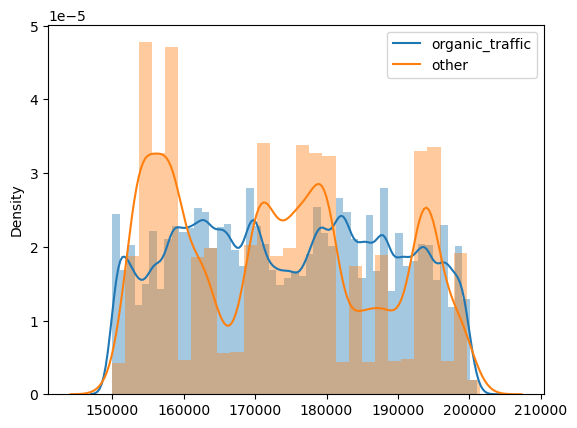

In [49]:
sns.distplot(marketing[marketing['ad_channel']=='organic_traffic'].timestamp.values)
sns.distplot(marketing[marketing['ad_channel']=='other'].timestamp.values)
plt.legend(['organic_traffic','other'])

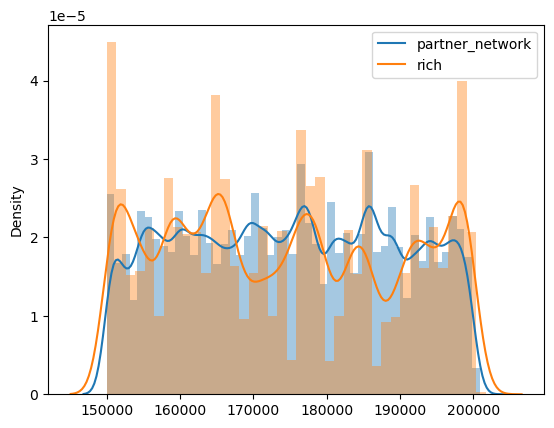

In [48]:
sns.distplot(marketing[marketing['ad_channel']=='partner_network'].timestamp.values)
sns.distplot(marketing[marketing['ad_channel']=='rich'].timestamp.values)
plt.legend(['partner_network','rich'])

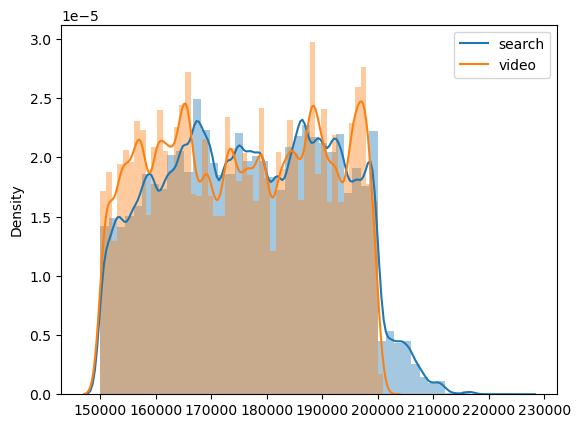

In [47]:
sns.distplot(marketing[marketing['ad_channel']=='search'].timestamp.values)
sns.distplot(marketing[marketing['ad_channel']=='video'].timestamp.values)
plt.legend(['search','video'])

In [27]:
time = marketing.timestamp.values

In [28]:
q95,q5 = np.percentile(time,[95,5])
print(q95,q5)

198256.0 152950.0


In [29]:
marketing_clean = marketing[(marketing.timestamp>q5)&(marketing.timestamp<q95)]

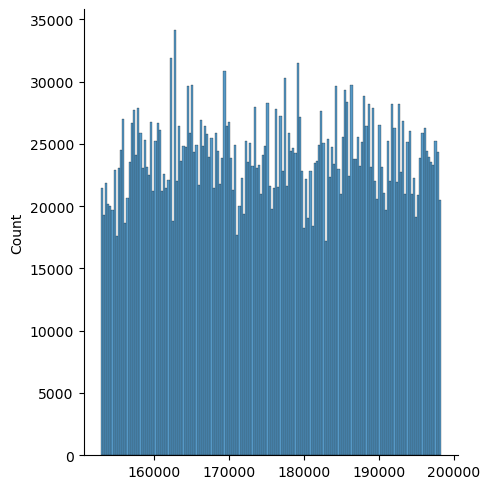

In [30]:
sns.displot(marketing_clean.timestamp.values)

In [31]:
marketing_clean.groupby(['ad_channel','funnel_stage']).nunique('user_id')

user_id  timestamp  profit  os
ad_channel      funnel_stage                                 
banner          consideration    42937      27724       1   2
                intent            6923       6424       1   2
                interest         83383      38106       1   2
                purchase           636        632       6   2
native          consideration    11408      10047       1   2
                intent             385        382       1   2
                interest         17561      14566       1   2
                purchase            33         33       4   2
organic_traffic consideration    48666      29813       1   2
                intent            8304       7543       1   2
                interest         71341      35849       1   2
                purchase           498        492       6   2
other           consideration     1636       1602       1   2
                intent             205        205       1   2
                interest          2907       2811       1   2
                purchase            38         38       6   2
partner_network consideration    22421      17721       1   2
                intent            4019       3829       1   2
                interest         60087      33344       1   2
                purchase           407        399       4   2
rich            consideration     4229       4038       1   2
                intent            1114       1105       1   2
                interest          8070       7398       1   2
                purchase            20         20       2   2
search          consideration   117649      41877       1   2
                intent           23284      18279       1   2
                interest        199317      44762       1   2
                purchase          2507       2427       6   2
video           consideration    55175      32016       1   2
                intent              54         54       1   2
                interest         88794      38981       1   2
                purchase             5          5       4   2

In [32]:
marketing_anomalies = marketing[(marketing.timestamp<q5)|(marketing.timestamp>q95)]
marketing_anomalies

,user_id,funnel_stage,timestamp,profit,os,ad_channel
0,512217,interest,150000,0.0,iOS,video
1,833649,interest,150000,0.0,Android,video
2,327813,interest,150002,0.0,Android,video
3,241345,interest,150004,0.0,iOS,video
4,212554,interest,150004,0.0,Android,video
...,...,...,...,...,...,...
130596,704762,consideration,200781,0.0,iOS,native
130597,659956,consideration,200792,0.0,iOS,native
130598,500938,consideration,200843,0.0,iOS,native
130599,388053,purchase,201095,2136.0,Android,native


In [33]:
marketing_anomalies['profit_nan']=marketing_anomalies['profit']==0
df_fraud = marketing_anomalies.drop(['profit'],axis=1) #Процент  фродовых данных составляет 10% 
df_fraud

,user_id,funnel_stage,timestamp,os,ad_channel,profit_nan
0,512217,interest,150000,iOS,video,True
1,833649,interest,150000,Android,video,True
2,327813,interest,150002,Android,video,True
3,241345,interest,150004,iOS,video,True
4,212554,interest,150004,Android,video,True
...,...,...,...,...,...,...
130596,704762,consideration,200781,iOS,native,True
130597,659956,consideration,200792,iOS,native,True
130598,500938,consideration,200843,iOS,native,True
130599,388053,purchase,201095,Android,native,False


In [34]:
df_fraud.to_pickle (" fraud.pkl ")